## Machine Learning using Wheat Seed Dataset
1. Dataset: https://archive.ics.uci.edu/ml/datasets/seeds
2. Problem statement: Detection for varieties of wheat seeds.
3. Type of problem: Classification, Supervised
4. Data type: csv file
5. Performance Measures: Accuracy, Precision, Recall, Confusion Matrix

### Classification Algorithms:
1. K-Nearest Neighbor
2. SVM Classifier
3. Logistic Regression
4. Decision Tree
5. Random Forest
6. XGBoost Classifier
7. AdaBoost Classifier
8. Gradient Boosting Classifier

### Other Libraries:
1. GridsearchCV for hyperparameter tuning
2. randomsearchCV for hyperparameter tuning
3. Reference Link: https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv

### Read data from a file wheat-seeds.csv
1. wheat-seeds.csv file contains 7 features and 1 target class.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ws=pd.read_csv('wheat-seeds.csv')

In [3]:
ws.shape

(210, 8)

In [4]:
ws.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Exploratory Data Analysis

## Missing data

In [5]:
ws.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [6]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             210 non-null    float64
 1   Perimeter        210 non-null    float64
 2   Compactness      210 non-null    float64
 3   Kernel.Length    210 non-null    float64
 4   Kernel.Width     210 non-null    float64
 5   Asymmetry.Coeff  210 non-null    float64
 6   Kernel.Groove    210 non-null    float64
 7   Type             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


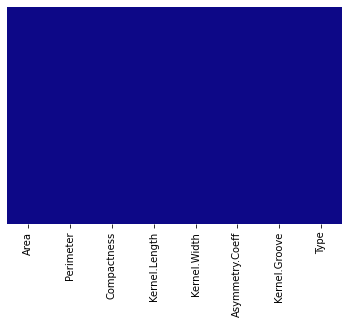

In [7]:
import seaborn as sns
sns.heatmap(ws.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [8]:
ws.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Correlation Matrix with Heatmap

In [9]:
ws.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Kernel.Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Kernel.Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry.Coeff,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Kernel.Groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


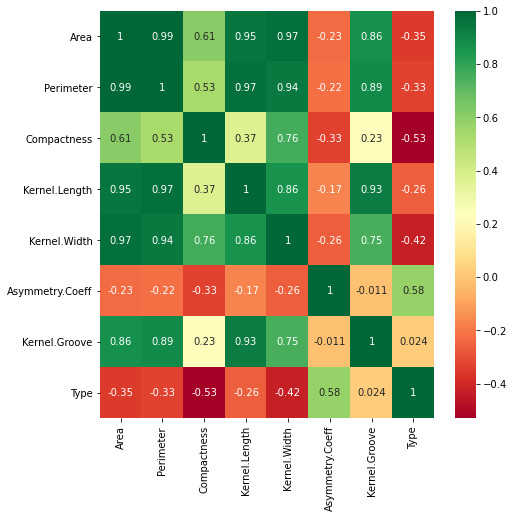

In [10]:
#get correlations of each features in dataset
plt.figure(figsize=(7.5,7.5))
#plot heat map
g=sns.heatmap(ws.corr(),annot=True,cmap="RdYlGn")

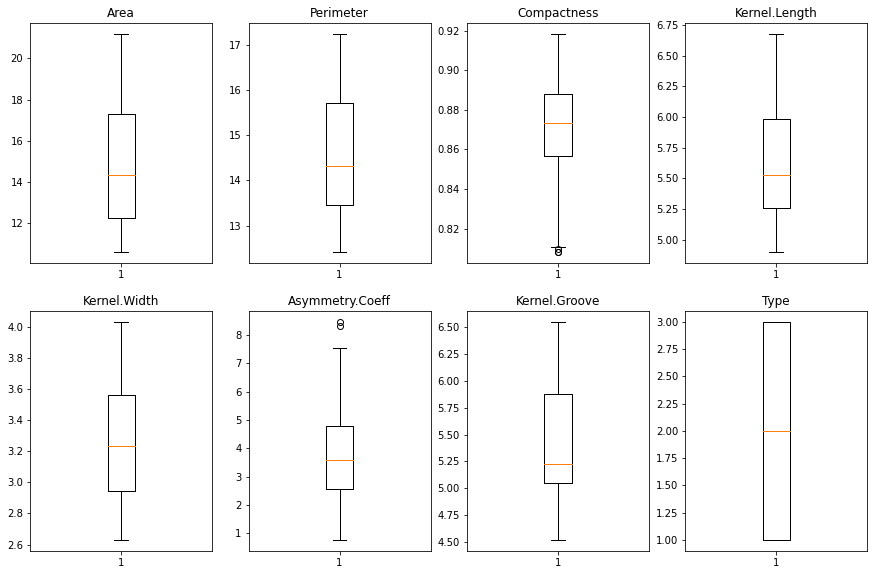

In [11]:
#checking for outliers
plt.figure(figsize = (15,15))
count = 1
for col in ws:
    plt.subplot(3,4,count)
    plt.boxplot(ws[col])
    plt.title(col)
    count +=1
        
plt.show()

## Remove outliers

In [ ]:
# from scipy import stats
# z = np.abs(stats.zscore(ws))
# print(np.where(z > 3)) # Threshold = 3

In [ ]:
# print(ws.iloc[[203,207]])

In [ ]:
# ws = ws[(z < 3).all(axis=1)]
# ws.shape

### Check whether data is balanced or imbalanced

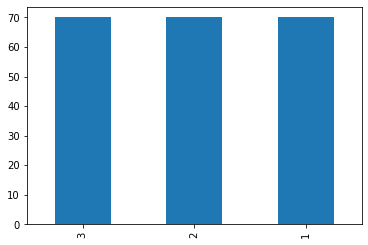

In [12]:
data_check = ws['Type'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

## Splitting x and y   (i.e. Features and Labels)

In [13]:
x = ws.iloc[:,:7].values
y = ws.iloc[:,-1].values

## Feature Scaling

In [14]:
from sklearn import preprocessing
x =preprocessing.StandardScaler().fit_transform(x)

## 1.K-Nearest Neighbor

### Hyperparameter tuning using GridsearchCV

In [15]:
k_range = list(range(1,21))
weight_options = ["uniform", "distance"]
metric_K = ["euclidean","manhattan"]
param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_K)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv = 10,verbose = 1, n_jobs = -1)
grid.fit(x,y)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    7.8s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [18]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9285714285714286
{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=10)


## Splitting the data to training-set and testing-set

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(168, 7)
(168,)
(42, 7)
(42,)


## Training and Predicting

In [24]:
knnmodel = KNeighborsClassifier(n_neighbors = 10,metric='euclidean',weights='uniform')
knnmodel.fit(x_train,y_train)
y_pred = knnmodel.predict(x_test)

## Accuracy

In [25]:
from sklearn.metrics import accuracy_score
KNN_Acc = accuracy_score(y_test,y_pred)
print(KNN_Acc)

0.9523809523809523


## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  1,  1],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94         8
           3       0.94      1.00      0.97        17

    accuracy                           0.95        42
   macro avg       0.94      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42



# 2. SVM Classifier

In [29]:
from sklearn.svm import SVC

In [87]:
#1) Linear Kernel
classifier = SVC(kernel = 'linear', random_state = 0, C=10, gamma=0.1)
classifier.fit(x_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear', random_state=0)

In [88]:
y_pred = classifier.predict(x_test)

In [89]:
# Accuracy
SVMLinear_Acc=accuracy_score(y_test,y_pred)
print(SVMLinear_Acc)

0.9761904761904762


In [33]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  1],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00         8
           3       0.94      1.00      0.97        17

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



In [92]:
#2) polynomial kernel
svclassifier = SVC(kernel='poly',degree=5,gamma=0.1,random_state =10,C=10)
svclassifier.fit(x_train, y_train)

SVC(C=10, degree=5, gamma=0.1, kernel='poly', random_state=10)

In [93]:
y_pred = svclassifier.predict(x_test)

In [94]:
# Accuracy
SVMPoly_Acc=accuracy_score(y_test,y_pred)
print(SVMPoly_Acc)

0.8809523809523809


In [38]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 1,  7,  0],
       [ 4,  0, 13]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        17
           2       1.00      0.88      0.93         8
           3       1.00      0.76      0.87        17

    accuracy                           0.88        42
   macro avg       0.92      0.88      0.89        42
weighted avg       0.91      0.88      0.88        42



In [95]:
#3) Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [96]:
y_pred = svclassifier.predict(x_test)

In [97]:
# Accuracy
SVMrbf_Acc=accuracy_score(y_test,y_pred)
print(SVMrbf_Acc)

0.9523809523809523


In [43]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  1,  1],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94         8
           3       0.94      1.00      0.97        17

    accuracy                           0.95        42
   macro avg       0.94      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42



# 3.LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred = logmodel.predict(x_test)

In [48]:
# Accuracy
LR_Acc=accuracy_score(y_test,y_pred)
print(LR_Acc)

0.9523809523809523


In [49]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  1,  1],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94         8
           3       0.94      1.00      0.97        17

    accuracy                           0.95        42
   macro avg       0.94      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42



# 4.DecisionTree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model = DecisionTreeClassifier(random_state=1,criterion='gini')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [53]:
# Accuracy
DT_Acc=accuracy_score(y_test,y_pred)
print(DT_Acc)

0.9285714285714286


In [54]:
#Confusion_matrix
confusion_matrix(y_test,ypredict)

array([[15,  1,  1],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.88      0.91        17
           2       0.89      1.00      0.94         8
           3       0.94      0.94      0.94        17

    accuracy                           0.93        42
   macro avg       0.92      0.94      0.93        42
weighted avg       0.93      0.93      0.93        42



# 5.Random Forest 

### Hyperparameter tuning using RandomSearchCV

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [57]:
#hyperparameters values
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(5, 9),
    'max_features':randint(1, 9),
    'min_samples_leaf':randint(1, 9),
    'n_estimators':randint(100,250)
}
#### initial model
model = RandomForestClassifier()

random_search = RandomizedSearchCV(model,param_distributions = params,cv = 10)

In [58]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000029344700D0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000029344703D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000002930F0DF10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000002933955FA0>})

In [59]:
print(random_search.best_params_)
print(random_search.best_estimator_)
print(random_search.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 124}
RandomForestClassifier(max_depth=7, max_features=7, min_samples_leaf=2,
                       n_estimators=124)
0.9341911764705882


In [60]:
best_random = random_search.best_estimator_

In [61]:
y_pred = best_random.predict(x_test)

In [62]:
#Accuracy
RF_Acc=accuracy_score(y_test,y_pred)
print(RF_Acc)

1.0


In [64]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



# 6. xgboost

In [66]:
import xgboost as xgb

In [67]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)

C:\Users\DEEPIKA\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
xgb_clf.score(x,y)

0.9952380952380953

In [69]:
xgb_clf.score(x_test,y_test)

0.9761904761904762

In [70]:
y_pred = xgb_clf.predict(x_test)

In [71]:
#Accuracy
XGB_Acc=accuracy_score(y_test,y_pred)
print(XGB_Acc)

0.9761904761904762


In [72]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16,  1,  0],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        17

    accuracy                           0.98        42
   macro avg       0.96      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42



## 7.AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ada = AdaBoostClassifier(base_estimator=None,n_estimators=109,learning_rate=0.1)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [76]:
# Accuracy
AdaB_Acc=accuracy_score(y_test,y_pred)
print(AdaB_Acc)

0.7619047619047619


In [77]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  0,  2],
       [ 8,  0,  0],
       [ 0,  0, 17]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.88      0.75        17
           2       0.00      0.00      0.00         8
           3       0.89      1.00      0.94        17

    accuracy                           0.76        42
   macro avg       0.52      0.63      0.56        42
weighted avg       0.63      0.76      0.69        42



C:\Users\DEEPIKA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8.GradientBoostingClassifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1)
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)

In [81]:
# Accuracy
GB_Acc=accuracy_score(y_test,y_pred)
print(GB_Acc)

0.9523809523809523


In [82]:
#Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  1,  1],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94         8
           3       0.94      1.00      0.97        17

    accuracy                           0.95        42
   macro avg       0.94      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42



## Final Evaluation

In [103]:
print('KNN Classifier Algorithm Accuracy is',KNN_Acc)
print('SVM [Kernel = Linear] Classifier Algorithm Accuracy is',SVMLinear_Acc)
print('SVM [Kernel = Poly] Classifier Algorithm Accuracy is',SVMPoly_Acc)
print('SVM [Kernel = rbf] Classifier Algorithm Accuracy is',SVMrbf_Acc)
print('Logistic Regression Classifier Algorithm Accuracy is',LR_Acc)
print('Decision Tree Classifier Algorithm Accuracy is',DT_Acc)
print('Random Forest Classifier Algorithm Accuracy is',RF_Acc)
print('xgboost Classifier Algorithm Accuracy is',XGB_Acc)
print('AdaBoost Classifier  Algorithm Accuracy is',AdaB_Acc)
print('Gradient Boosting Classifier Algorithm Accuracy is',GB_Acc)

KNN Classifier Algorithm Accuracy is 0.9523809523809523
SVM [Kernel = Linear] Classifier Algorithm Accuracy is 0.9761904761904762
SVM [Kernel = Poly] Classifier Algorithm Accuracy is 0.8809523809523809
SVM [Kernel = rbf] Classifier Algorithm Accuracy is 0.9523809523809523
Logistic Regression Classifier Algorithm Accuracy is 0.9523809523809523
Decision Tree Classifier Algorithm Accuracy is 0.9285714285714286
Random Forest Classifier Algorithm Accuracy is 1.0
xgboost Classifier Algorithm Accuracy is 0.9761904761904762
AdaBoost Classifier  Algorithm Accuracy is 0.7619047619047619
Gradient Boosting Classifier Algorithm Accuracy is 0.9523809523809523


    In terms of accuracy score, the Random Forest Classifier was the most accurate.
    Again, the Random Forest Classifier has the highest range of F1-Score:

### Hence, we conclude that both in terms of accuracy score and F1-score, the Random Forest classifier performed the best.